In [119]:
#loading data from url
import pandas as pd
import io
import requests

s=requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data").content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),error_bad_lines=False,header=None)

In [120]:
from sklearn import preprocessing

X,y=pd.DataFrame(data.iloc[:,2:].values),pd.DataFrame(data.iloc[:,1].values)
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

C:\Users\vikhy\Anaconda3\Anaconda-3.5\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
from sklearn import linear_model
import time
start = time.time()
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
end = time.time()

C:\Users\vikhy\Anaconda3\Anaconda-3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Confusion matrix
 [[88  1]
 [ 1 53]]
Accuracy:  98.6013986014 %
Precision: 0.981481481481
Recall: 0.981481481481
F1 score: 0.981481481481


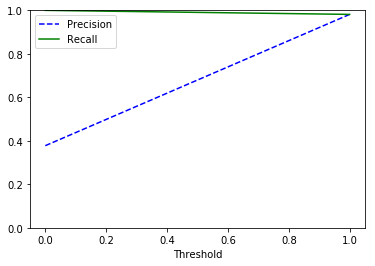

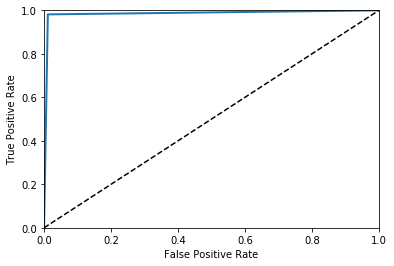

Confusion matrix


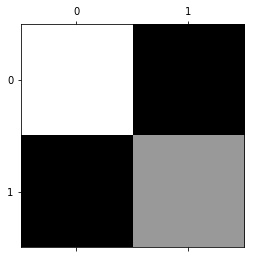

Confusion matrix of errors


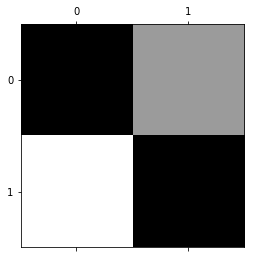

Time elapsed:  0.0020079612731933594 seconds


In [125]:
plot_results(y_test,y_pred)
print('Time elapsed: ',end - start,'seconds')

In [126]:
import tensorflow as tf
#Construction and execution
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[30], n_classes=2,feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) 

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001336CD66358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\vikhy\\AppData\\Local\\Temp\\tmpsom_sdcy'}


In [127]:
#Fit and predict
start = time.time()
dnn_clf.fit(X_train, y_train, batch_size=1, steps=300)
y_pred = dnn_clf.predict(X_test)
end = time.time()

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\vikhy\AppData\Local\Temp\tmpsom_sdcy\model.ckpt.
INFO:tensorflow:loss = 0.689775, step = 1
INFO:tensorflow:global_step/sec: 1456.03
INFO:tensorflow:loss = 0.000426099, step = 101 (0.069 sec)
INFO:tensorflow:global_step/sec: 1112.49
INFO:tensorflow:loss = 0.0323459, step = 201 (0.091 sec)
INFO:tensorflow:Saving checkpoints for 300 into C:\Users\vikhy\AppData\Local\Temp\tmpsom_sdcy\model.ckpt.
INFO:tensorflow:Loss for final step: 0.000227964.
INFO:tensorflow:Restoring parameters from C:\Users\vikhy\AppData\Local\Temp\tmpsom_sdcy\model.ckpt-300


In [128]:
def plot_results(y_test,y_pred):
    conf_mx=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',conf_mx)
    print('Accuracy: ',accuracy_score(y_test,y_pred)*100,'%')
    #Precision,recalland f1 scores
    print('Precision:',precision_score(y_test, y_pred))
    print('Recall:',recall_score(y_test, y_pred)) 
    print('F1 score:',f1_score(y_test, y_pred))  
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold") 
    plt.legend(loc="upper left")
    plt.ylim([0, 1])  
    plt.show()
    #ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2, label=None) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.show()
    print('Confusion matrix')
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    print('Confusion matrix of errors')
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0) 
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray) 
    plt.show()

Confusion matrix
 [[88  1]
 [ 1 53]]
Accuracy:  98.6013986014 %
Precision: 0.981481481481
Recall: 0.981481481481
F1 score: 0.981481481481


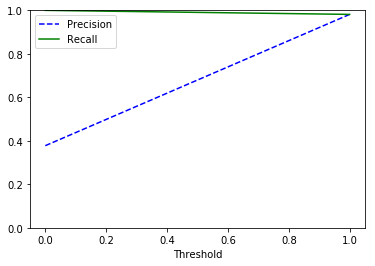

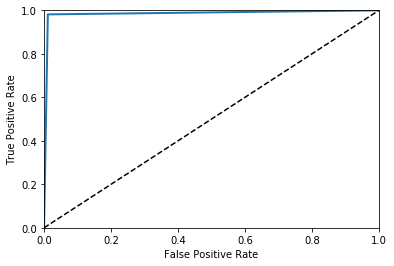

Confusion matrix


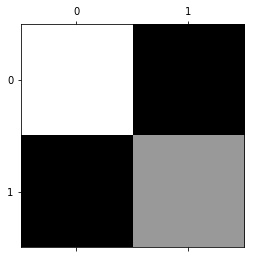

Confusion matrix of errors


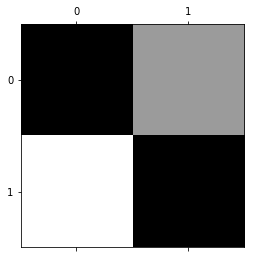

Time elapsed:  4.7271881103515625 seconds


In [129]:
plot_results(y_test,y_pred['classes'])
print('Time elapsed: ',end - start,'seconds')